<a href="https://colab.research.google.com/github/brunokobi/Rede_Neurais/blob/main/Reutes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

# Define parâmetros para a rede neural
max_words = 10000
epochs = 20
# Carregue os dados Reuters e divida em conjuntos de treinamento e teste
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words)

# Converta os dados em vetores binários one-hot
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Crie o modelo sequencial________________________________________________
model = Sequential()

#Essa linha adiciona uma camada densa à rede neural 512 neurois
model.add(Dense(1024, input_shape=(max_words,)))

#Essa linha adiciona uma camada de ativação softmax à rede neural.
model.add(Activation('relu'))

# Regularização comumente usada em redes neurais profundas para evitar o overfitting
model.add(Dropout(0.5))

#Essa linha adiciona uma camada densa à rede neural.
model.add(Dense(y_train.shape[1]))

#Essa linha adiciona uma camada de ativação softmax à rede neural.
model.add(Activation('softmax'))

# Compile o modelo________________________________________________
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Treine o modelo
history = model.fit(x_train, y_train,epochs=epochs, batch_size=512,validation_data=(x_test,y_test))

Epoch 1/20
18/18 [==============================] - 10s 547ms/step - loss: 1.7889 - accuracy: 0.6116 - val_loss: 1.2270 - val_accuracy: 0.7222
Epoch 2/20
18/18 [==============================] - 9s 498ms/step - loss: 0.9628 - accuracy: 0.7876 - val_loss: 1.0466 - val_accuracy: 0.7511
Epoch 3/20
18/18 [==============================] - 10s 567ms/step - loss: 0.7029 - accuracy: 0.8450 - val_loss: 0.9074 - val_accuracy: 0.7907
Epoch 4/20
18/18 [==============================] - 10s 569ms/step - loss: 0.5292 - accuracy: 0.8850 - val_loss: 0.8390 - val_accuracy: 0.8077
Epoch 5/20
18/18 [==============================] - 11s 616ms/step - loss: 0.4242 - accuracy: 0.9064 - val_loss: 0.8164 - val_accuracy: 0.8112
Epoch 6/20
18/18 [==============================] - 9s 498ms/step - loss: 0.3404 - accuracy: 0.9265 - val_loss: 0.8332 - val_accuracy: 0.8063
Epoch 7/20
18/18 [==============================] - 10s 554ms/step - loss: 0.2922 - accuracy: 0.9323 - val_loss: 0.8029 - val_accuracy: 0.8126
E

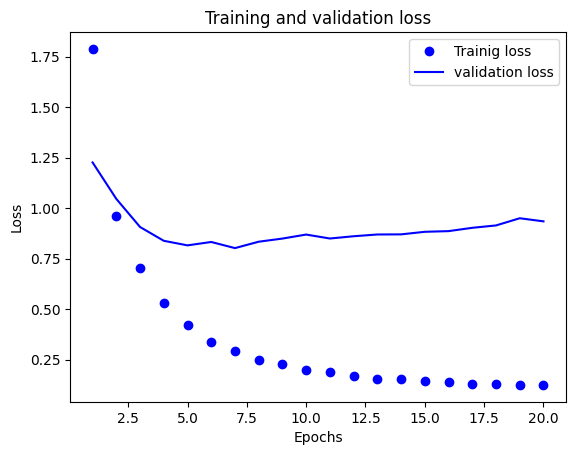

In [83]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Trainig loss")
plt.plot(epochs, val_loss_values, "b", label="validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

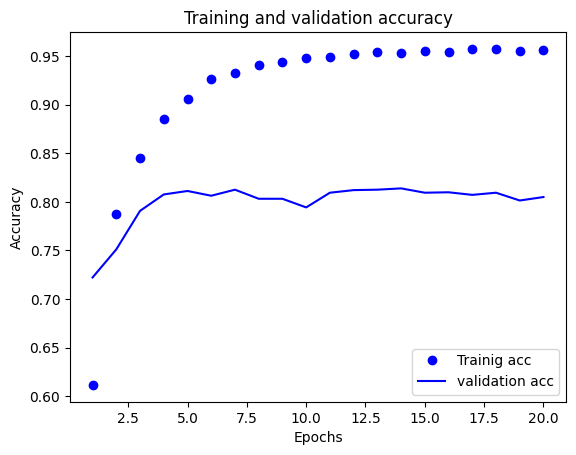

In [82]:
import matplotlib.pyplot as plt
history_dict = history.history
accuracy_values = history_dict["accuracy"]
val_accuracy_values = history_dict["val_accuracy"]
epochs = range(1, len(accuracy_values)+1)
plt.plot(epochs, accuracy_values, "bo", label="Trainig acc")
plt.plot(epochs, val_accuracy_values, "b", label="validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Avaliação do Modelo 20 Epochs**

In [81]:
# Avalie o modelo no conjunto de teste
score = model.evaluate(x_test, y_test)
print("\033[32;43m Acurácia: {:.2f} % \033[m".format(round(score[1], 4)*100))

71/71 [==============================] - 2s 21ms/step - loss: 0.9353 - accuracy: 0.8050
 Acurácia: 80.50 % 


**Avaliação do Modelo 5 Epochs**

In [89]:
# Compile o modelo________________________________________________
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Treine o modelo
history = model.fit(x_train, y_train,epochs=5, batch_size=512,validation_data=(x_test,y_test))

Epoch 1/5
18/18 [==============================] - 11s 587ms/step - loss: 0.1278 - accuracy: 0.9561 - val_loss: 0.9586 - val_accuracy: 0.8037
Epoch 2/5
18/18 [==============================] - 11s 648ms/step - loss: 0.1187 - accuracy: 0.9584 - val_loss: 0.9666 - val_accuracy: 0.8028
Epoch 3/5
18/18 [==============================] - 8s 457ms/step - loss: 0.1212 - accuracy: 0.9561 - val_loss: 0.9469 - val_accuracy: 0.8103
Epoch 4/5
18/18 [==============================] - 10s 568ms/step - loss: 0.1119 - accuracy: 0.9560 - val_loss: 0.9739 - val_accuracy: 0.8041
Epoch 5/5
18/18 [==============================] - 10s 564ms/step - loss: 0.1173 - accuracy: 0.9569 - val_loss: 0.9460 - val_accuracy: 0.8121


In [90]:
# Avalie o modelo no conjunto de teste
score = model.evaluate(x_test, y_test)
print("\033[32;43m Acurácia: {:.2f} % \033[m".format(round(score[1], 4)*100))

71/71 [==============================] - 2s 23ms/step - loss: 0.9460 - accuracy: 0.8121
 Acurácia: 81.21 % 
